# Bank Marketing Prediction

### Import Library & Load Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Loading the data
df = pd.read_csv('Adoption_Prediction_Dataset.csv')

In [3]:
# Check the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Data Understanding

In [4]:
# Check all columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
# Check info about dataset and each datatype of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# Check dataframe's dimension
df.shape

(11162, 17)

In [7]:
# Frequency of job
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

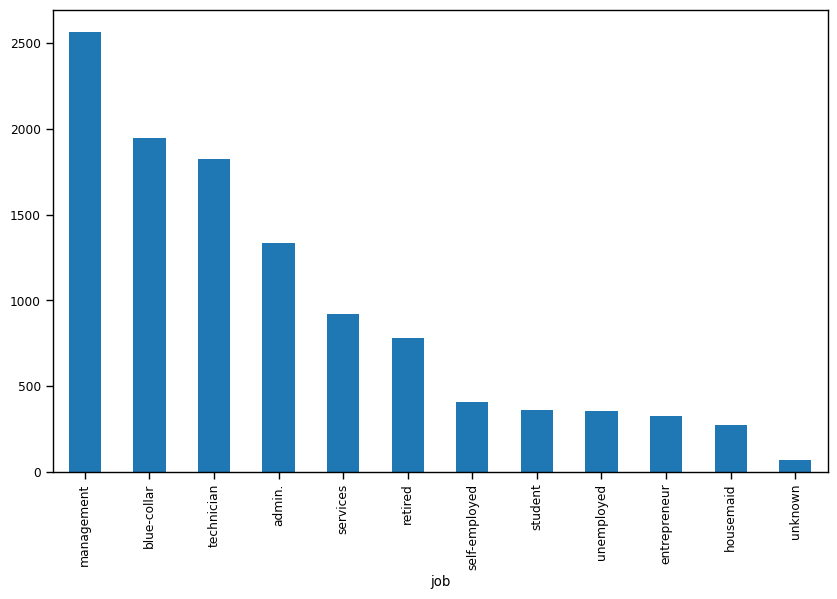

In [8]:
# Plotting the job frequency
sns.set_context('paper')
df['job'].value_counts().plot(kind='bar', figsize=(10,6));

We can see that most of the clients beloned to management-type job and housemaids are least in general as they don't make term deposits in general.

In [9]:
# Frequency of marital status
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

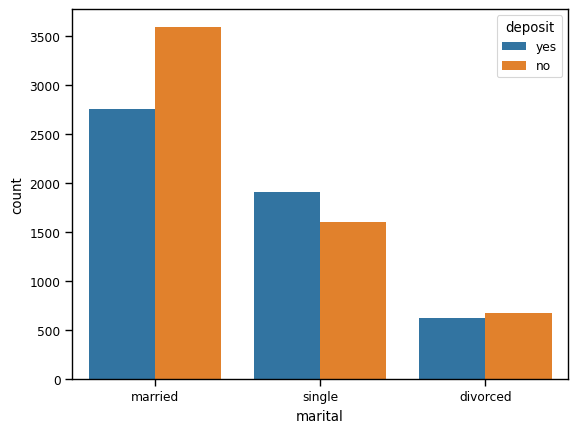

In [10]:
sns.countplot(data=df, x = 'marital', hue = 'deposit');

C:\Users\obeddavy\AppData\Local\Temp\ipykernel_4292\2430361757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']);


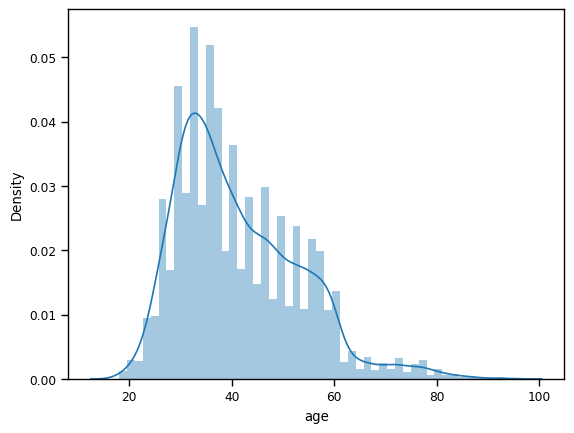

In [11]:
# Frequency of age
sns.distplot(df['age']);

We can infer that most of the clients fall in the age group between 20-60.

In [12]:
#Job status vs deposit
print(pd.crosstab(df['job'],df['deposit']))

deposit          no   yes
job                      
admin.          703   631
blue-collar    1236   708
entrepreneur    205   123
housemaid       165   109
management     1265  1301
retired         262   516
self-employed   218   187
services        554   369
student          91   269
technician      983   840
unemployed      155   202
unknown          36    34


In [13]:
job = pd.crosstab(df['job'],df['deposit'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

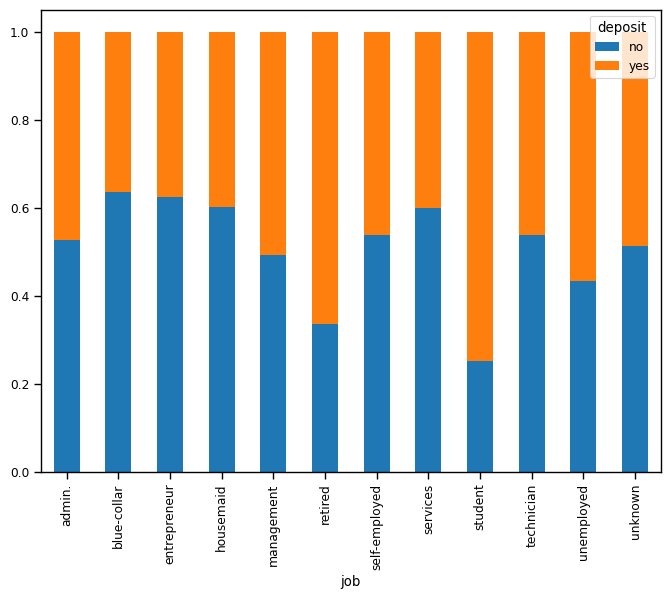

In [14]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the graph above,  we can conclude that students and retired people have higher chances of deposit.

In [15]:
# Marital status vs deposit
print(pd.crosstab(df['marital'],df['deposit']))

deposit     no   yes
marital             
divorced   671   622
married   3596  2755
single    1606  1912


In [16]:
marital = pd.crosstab(df['marital'],df['deposit'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

deposit,no,yes
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


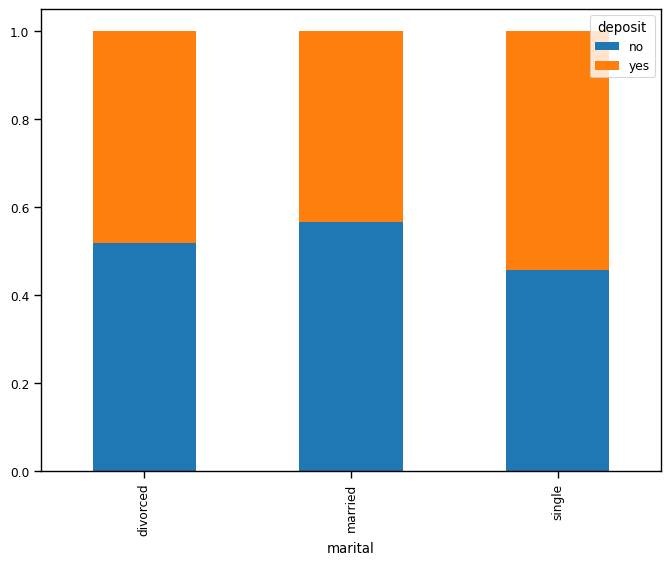

In [17]:
marital_norm.plot.bar(stacked=True, figsize=(8,6));

From the graph above, it can be seen that the tendency for single status to deposit money is greater than for other statuses and the number of depositors and those who are not is almost the same.

In [18]:
# Default vs Deposit
print(pd.crosstab(df['default'],df['deposit']))

deposit    no   yes
default            
no       5757  5237
yes       116    52


In [19]:
default = pd.crosstab(df['default'],df['deposit'])
default_norm = default.div(default.sum(1).astype(float), axis=0)
default_norm

deposit,no,yes
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


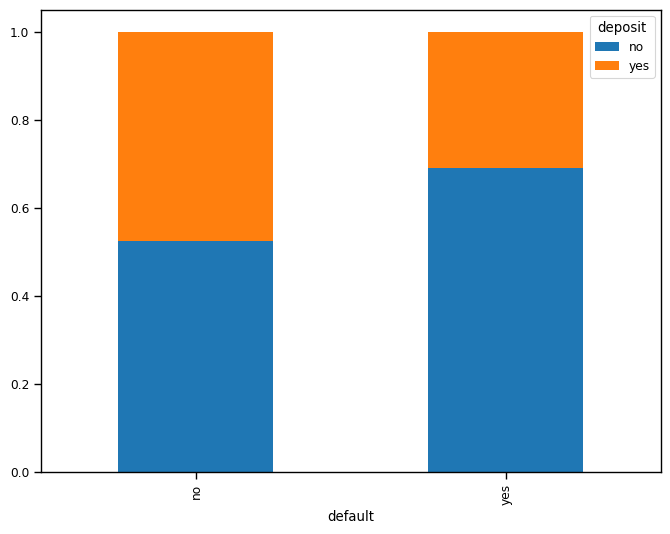

In [20]:
default_norm.plot.bar(stacked=True, figsize=(8,6));

We can conclude that clients having no previous default have slightly higher chances of deposit to term loan as compared to the clients who have previous default history.

In [21]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

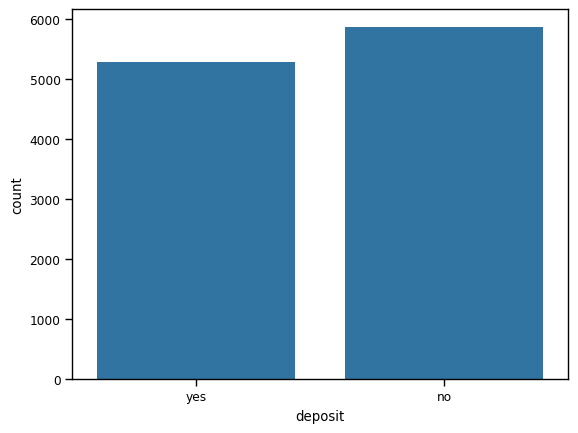

<Figure size 1000x700 with 0 Axes>

In [22]:
sns.countplot(data=df, x = "deposit");
plt.figure(figsize=(10, 7))
plt.show()

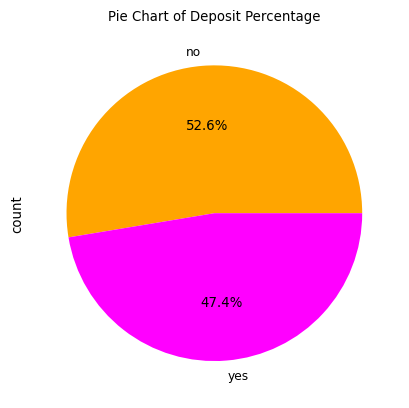

In [23]:
# Percentage of deposit
df['deposit'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    colors=['orange','magenta'])
plt.title("Pie Chart of Deposit Percentage")
plt.show()

Observation: Given dataset seems to be balanced.

In [24]:
df['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

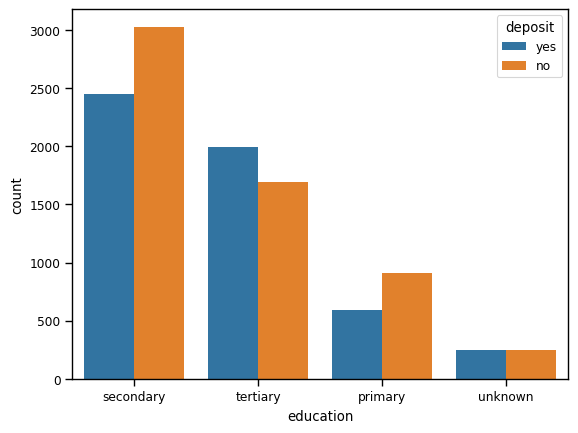

In [25]:
sns.countplot(data=df, x = 'education', hue = 'deposit');

Observation: Only tertiary education has a higher ratio of clients willing to deposit their money than other levels of education.

In [26]:
df['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

Observation: Calls to make deposits for many clients use cellular.

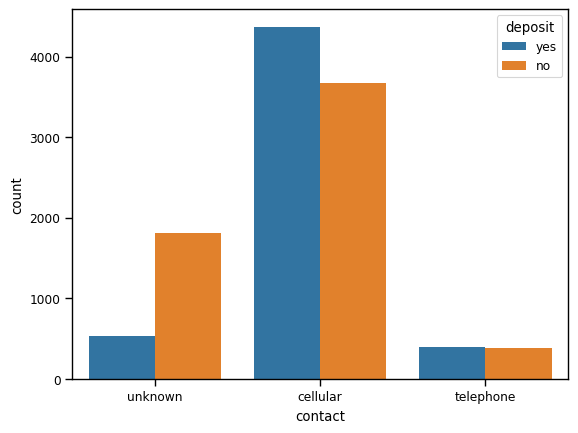

In [27]:
sns.countplot(data=df, x = 'contact', hue = 'deposit');

In [28]:
df['balance'].value_counts()

balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: count, Length: 3805, dtype: int64

In [29]:
(df['balance'] < 0).sum()

688

In [30]:
neg_balance = ((df['balance'] < 0).sum() / df['balance'].sum()) * 100
f"{neg_balance:.2%}"

'0.40%'

In [31]:
df['month'].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

Observation: Transactions attempting to make calls for deposits most often occur in May and less in December.

In [32]:
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

Observation: The outcome of a call to make a deposit is mostly unknown compared to whether it succeeds or fails.

In [33]:
df[df == 'unknown'].count().sort_values(ascending=False)

poutcome     8326
contact      2346
education     497
job            70
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
deposit         0
dtype: int64

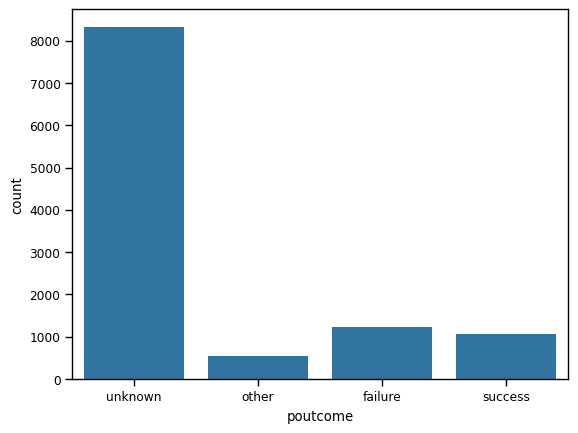

In [34]:
sns.countplot(data=df, x = 'poutcome');

#### Checking the Distribution / Statistic Descriptive

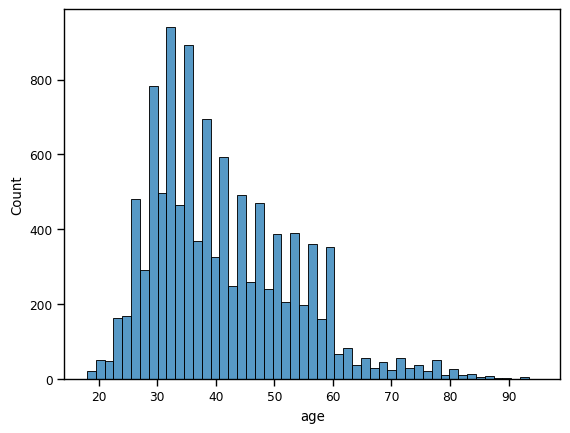

In [35]:
# Histogram
sns.histplot(df['age']);

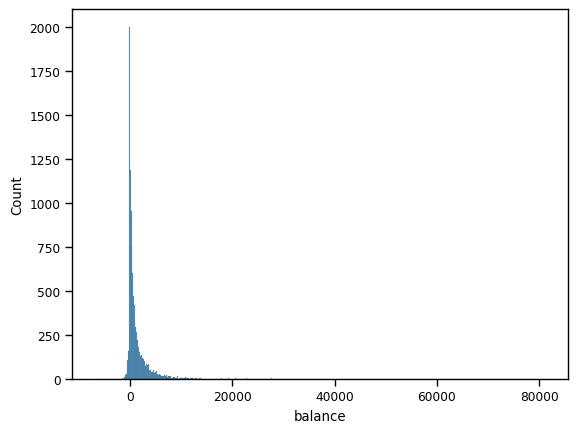

In [94]:
sns.histplot(df['balance']);

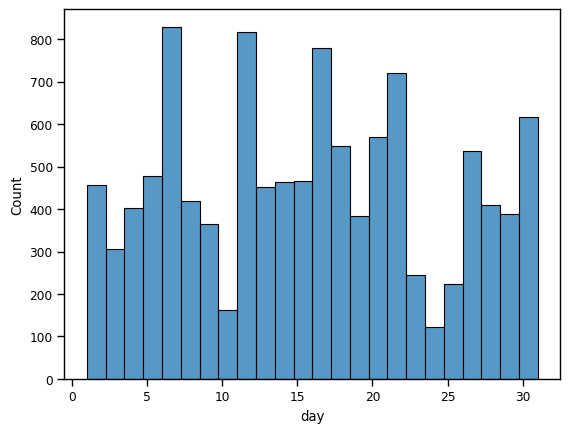

In [38]:
sns.histplot(df['day']);

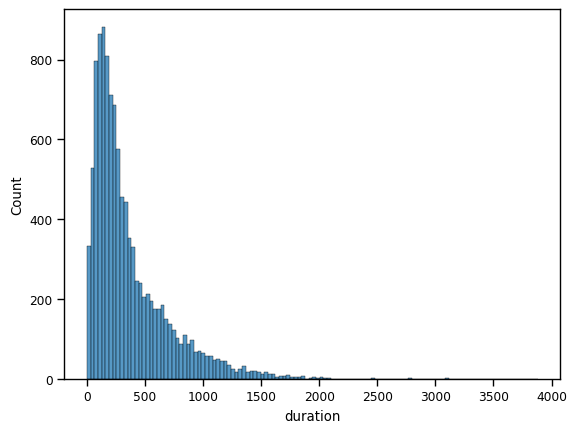

In [37]:
sns.histplot(df['duration']);

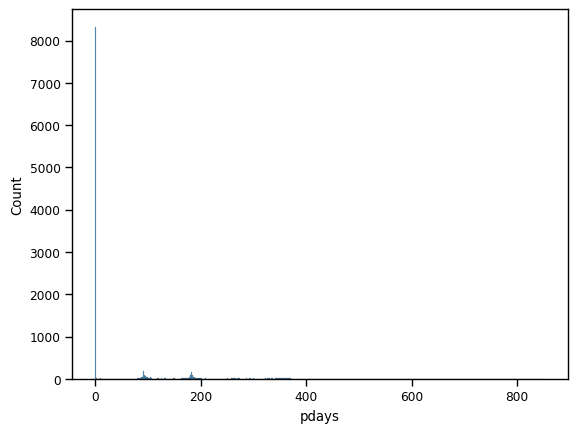

In [36]:
sns.histplot(df['pdays']);

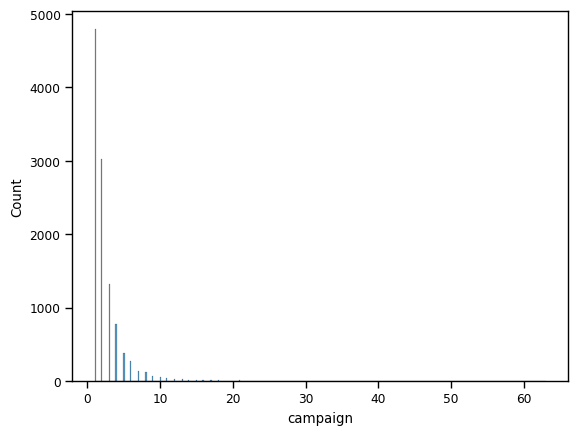

In [95]:
sns.histplot(df['campaign']);

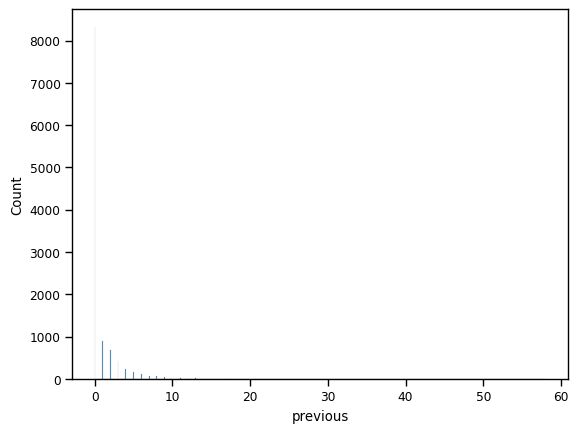

In [99]:
sns.histplot(df['previous']);

In [40]:
# Measure of Central Tendency
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [41]:
# Measure of Central Tendency
import statistics
print(statistics.mean(df['balance']))
print(statistics.median(df['balance']))
print(statistics.mean(df['duration']))
print(statistics.median(df['duration']))

1528.5385235620856
550.0
371.99381831213043
255.0


In [42]:
# Measure of Variability
print(np.var(df['balance']))
print(np.std(df['balance']))
print(np.max(df['balance']) - np.min(df['balance']))
print(np.quantile((df['balance']), 0.25))
print(np.quantile((df['balance']), 0.5))
print(np.quantile((df['balance']), 0.75))

10402359.09567621
3225.2688408373356
88051
122.0
550.0
1708.0


#### Data Cleansing

In [43]:
# Clean the Data
df.duplicated().sum()

0

There is no duplicated data

In [44]:
# Check missing value
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There is no missing value found

In [45]:
# Change data types
df["balance"] = df["balance"].astype("float64")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [47]:
# IQR
q1 = df["balance"].quantile(0.25)
q3 = df["balance"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["balance"] < fence_low) | (df["balance"] > fence_high)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9,28,services,single,secondary,no,5090.0,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes
60,51,blue-collar,married,secondary,no,7180.0,yes,no,unknown,14,may,927,1,-1,0,unknown,yes
61,41,blue-collar,divorced,secondary,no,5291.0,yes,no,unknown,14,may,1423,3,-1,0,unknown,yes
69,44,technician,married,tertiary,no,4580.0,yes,no,unknown,15,may,911,2,-1,0,unknown,yes
71,29,management,married,tertiary,no,10576.0,no,no,unknown,15,may,1224,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,34,blue-collar,married,primary,no,6718.0,no,no,cellular,13,jan,278,4,97,1,other,no
11077,54,retired,divorced,tertiary,no,6102.0,yes,yes,unknown,21,may,86,6,-1,0,unknown,no
11085,60,technician,married,primary,no,4243.0,yes,no,cellular,4,feb,387,1,251,1,failure,no
11086,42,admin.,married,secondary,no,6445.0,yes,no,unknown,2,jun,20,8,-1,0,unknown,no


In [48]:
# Handle outliers
# Using IQR
df_clean = df.loc[(df["balance"] >= fence_low) & (df["balance"] <= fence_high)]

df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


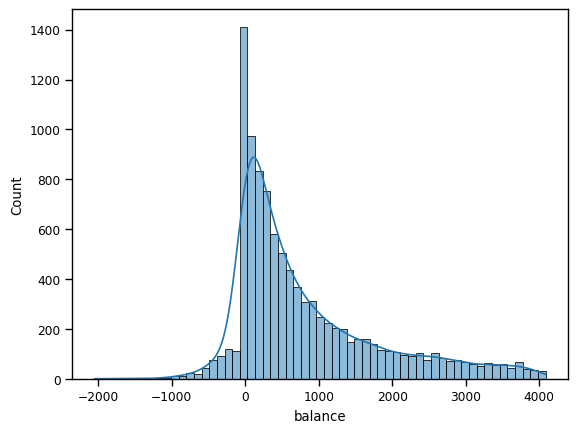

In [97]:
sns.histplot(df_clean['balance'], kde=True);

#### Exploratory Data Analysis (EDA)

In [50]:
# Separate numerical and caterogical feature

In [51]:
num_dtypes = ["int32", "int64", "float32", "float64"]

In [52]:
cate_dtypes = ["object"]

In [53]:
df_num = df_clean.select_dtypes(include = num_dtypes)
df_cate = df_clean.select_dtypes(include = cate_dtypes)

num_cols = df_num.columns
cate_cols = df_cate.columns

In [54]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [55]:
cate_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

##### Univariate Analysis

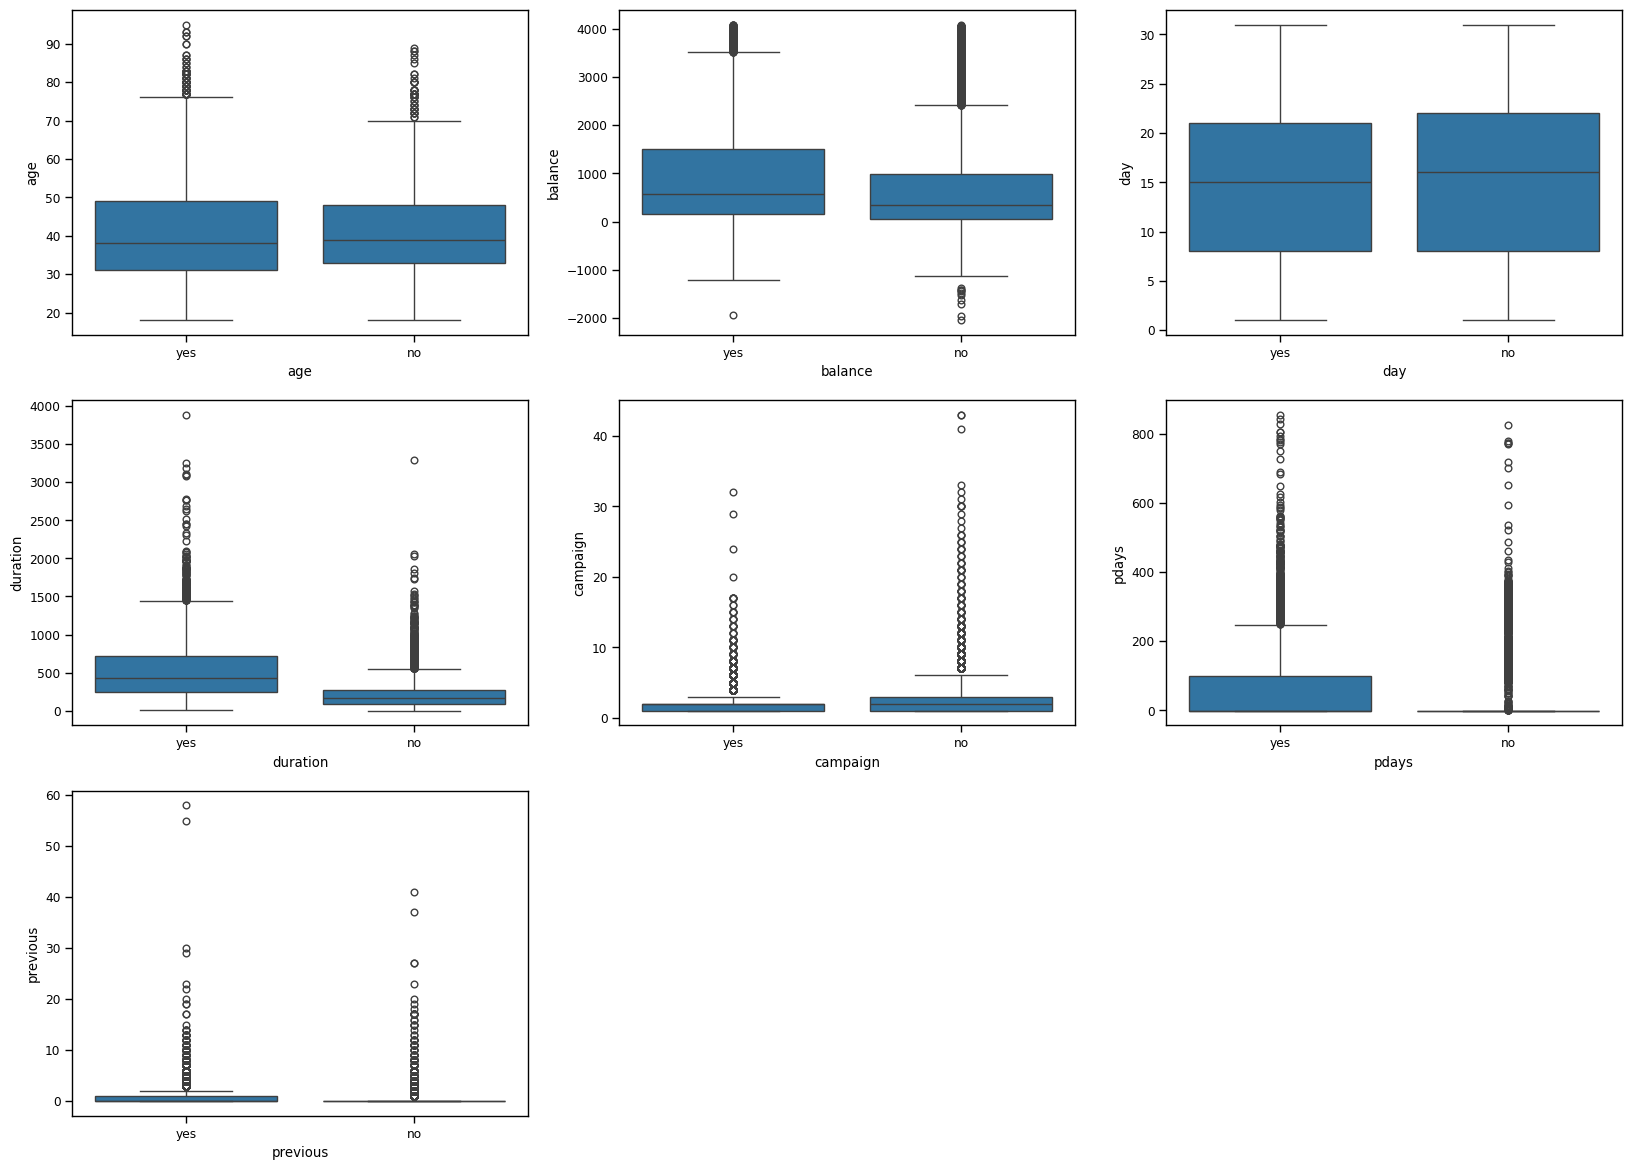

In [110]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df_clean)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Observation: Clients show interest on deposit who had discussion for longer duration.

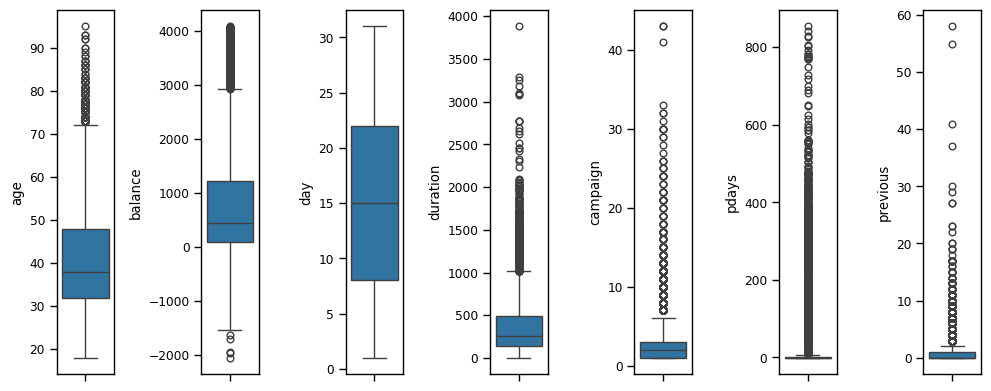

In [103]:
# Boxplot
plt.figure(figsize = (10,4))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(df_clean[num_cols[i]], orient = "v")
    plt.tight_layout()

Observation: Age, balance, duration, compaign, pdays and previous has some outliers.

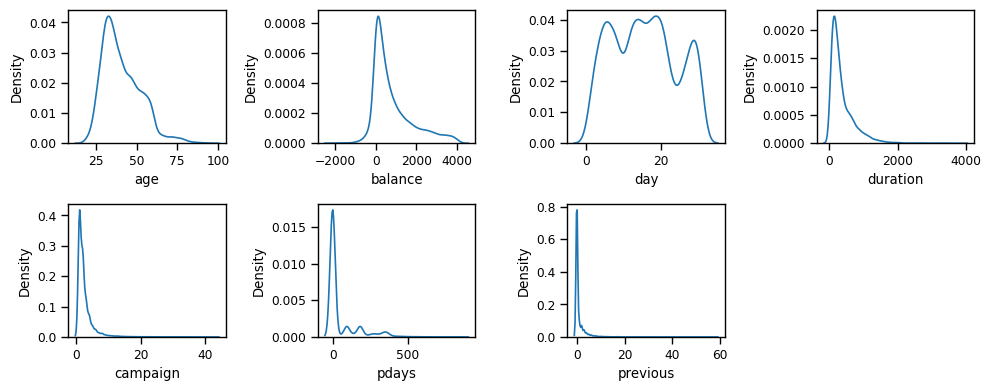

In [112]:
# Displot / KDE
plt.figure(figsize = (10,4))
for i in range(len(num_cols)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_clean[num_cols[i]])
    plt.tight_layout()

Observation:
- It seems age and day distributed normally
- alance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

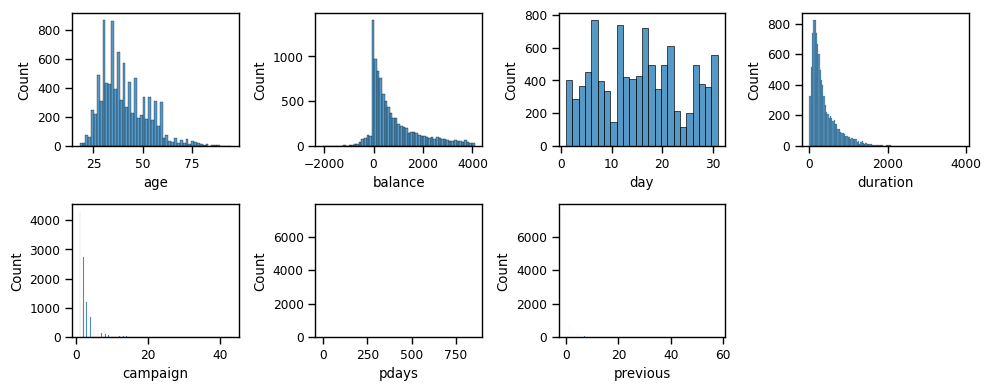

In [58]:
# Histogram
plt.figure(figsize = (10,4))
for i in range(len(num_cols)):
    plt.subplot(2,4,i+1)
    sns.histplot(df_clean[num_cols[i]])
    plt.tight_layout()

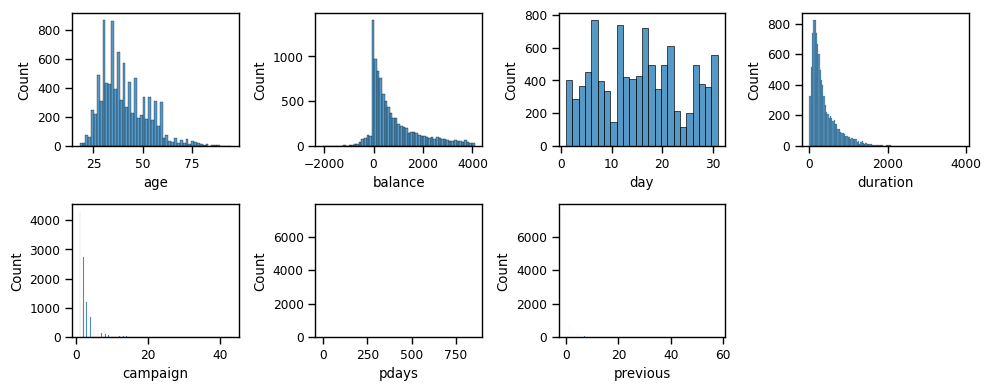

In [59]:
# Binning
plt.figure(figsize = (10,4))
for i in range(len(num_cols)):
    plt.subplot(2,4,i+1)
    sns.histplot(df_clean[num_cols[i]])
    plt.tight_layout()

In [60]:
df_num['balance'].describe()

count    10107.000000
mean       809.882557
std        997.790839
min      -2049.000000
25%         94.000000
50%        443.000000
75%       1228.000000
max       4087.000000
Name: balance, dtype: float64

##### Multivariate Analysis

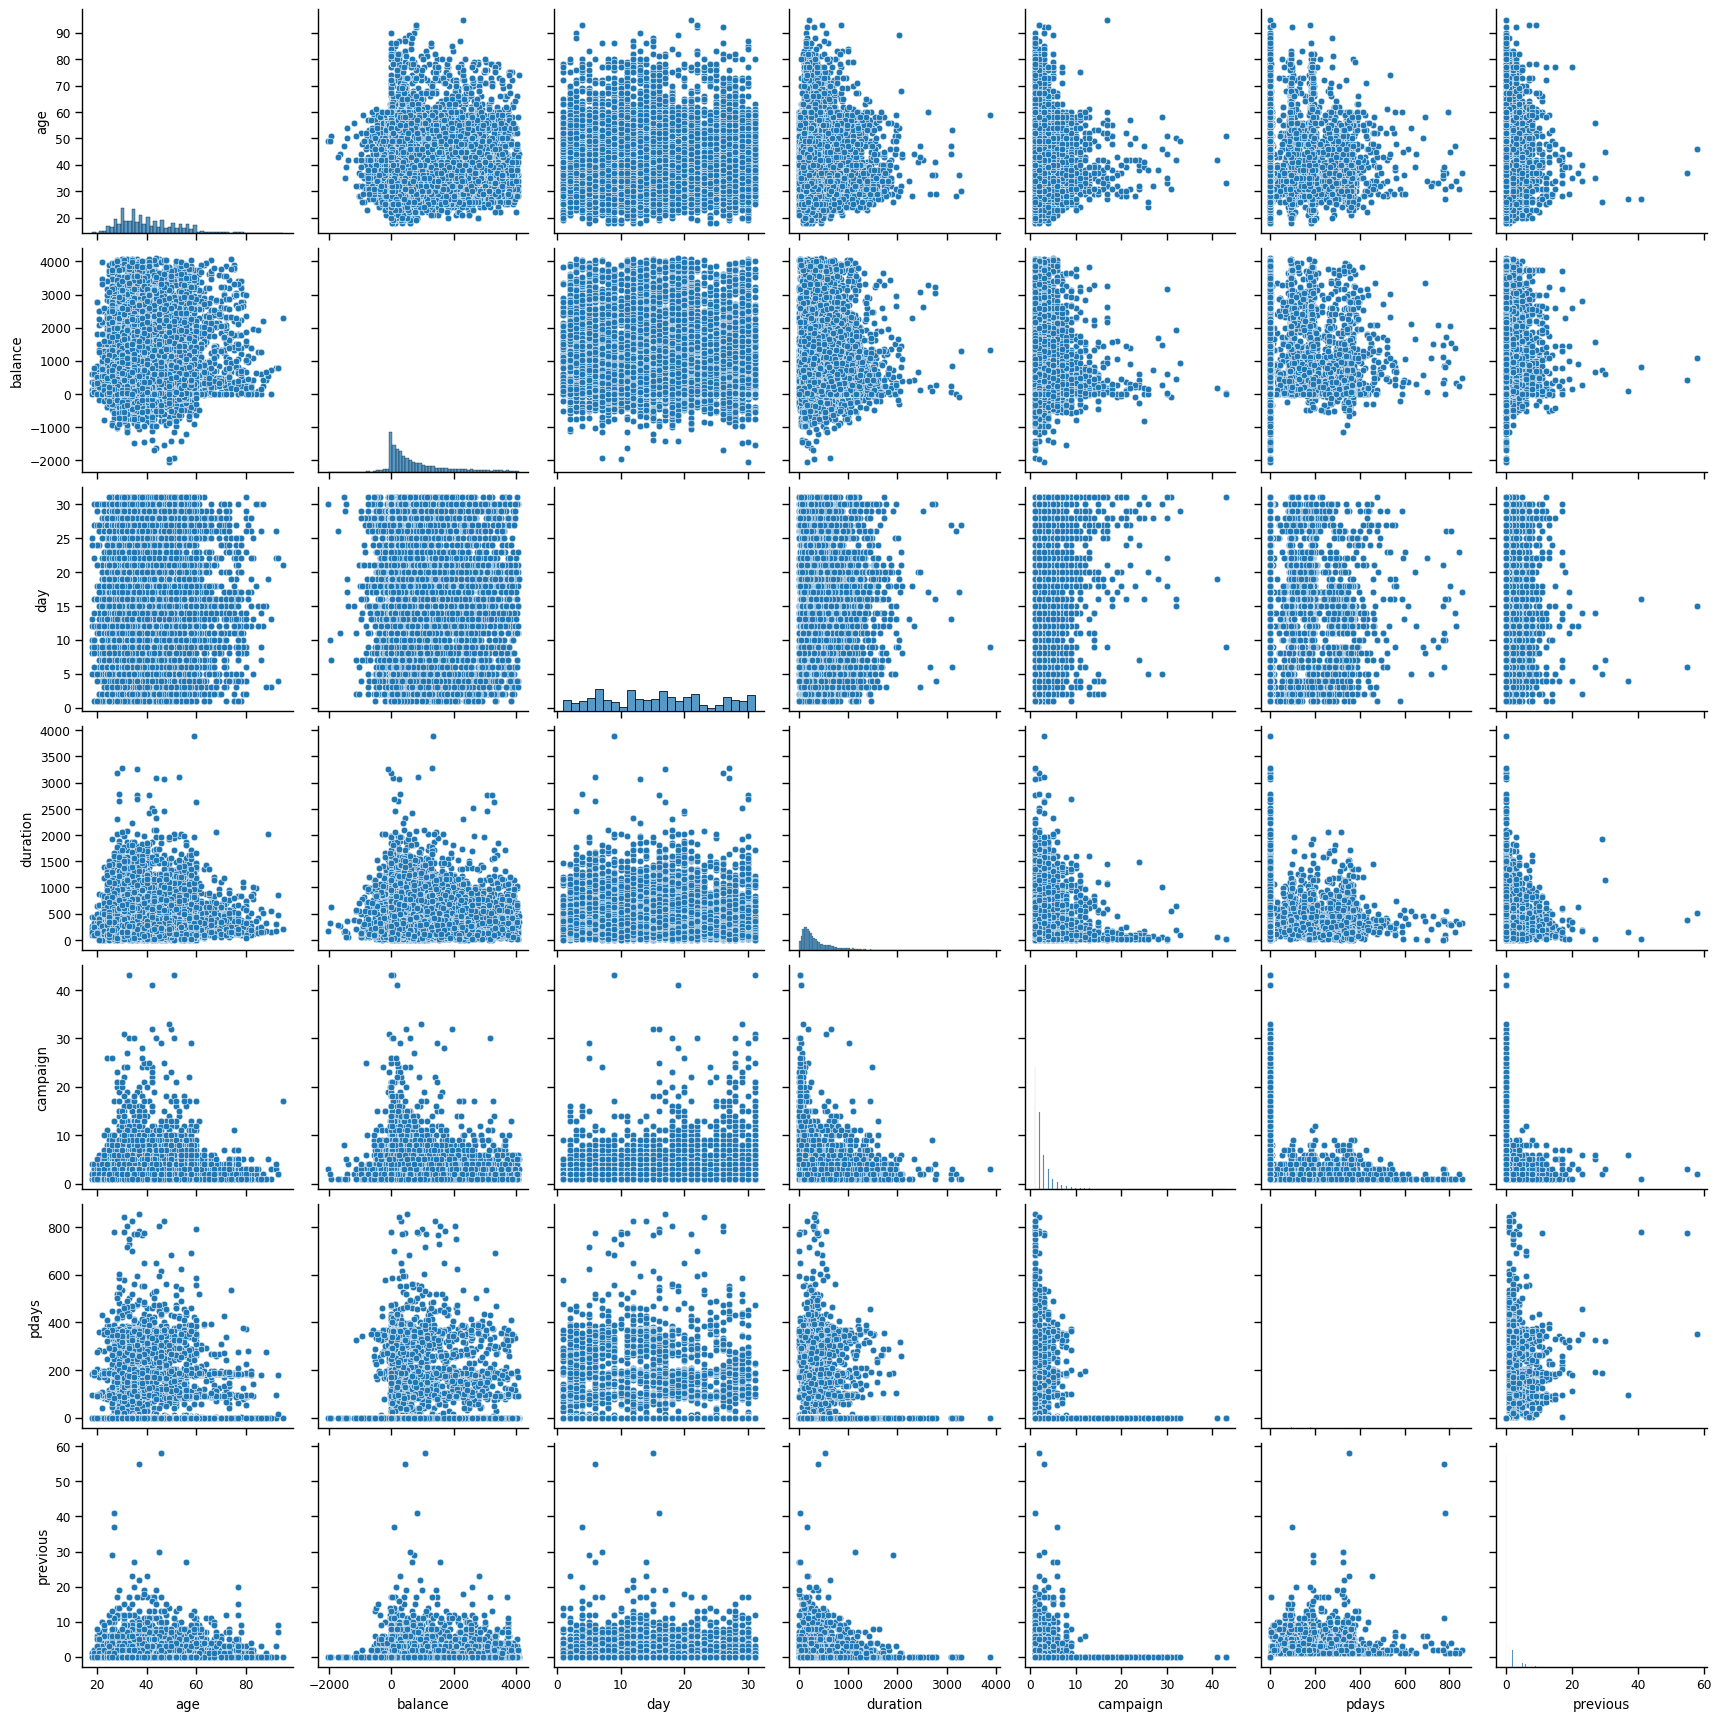

In [61]:
# Scatter plot for each combination of two numerical variables
sns.pairplot(df_clean[num_cols])

<Axes: >

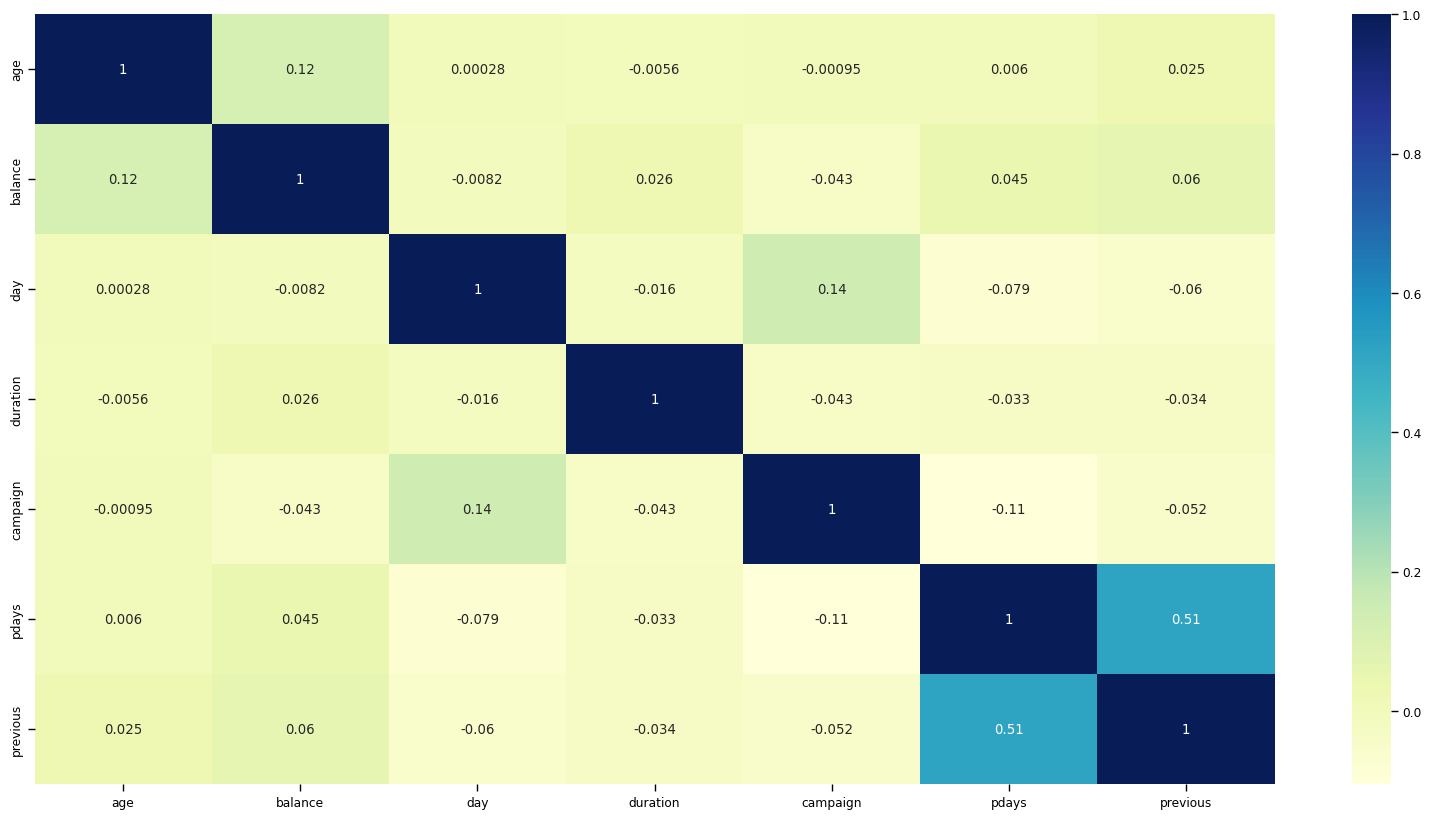

In [62]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df_clean[num_cols].corr(), cmap="YlGnBu", annot = True)

Observation: It seems no feature is heavily correlated with other features.

In [63]:
# Job vs Deposit
print(pd.crosstab(df_clean['job'],df_clean['deposit']))

deposit          no   yes
job                      
admin.          672   574
blue-collar    1155   652
entrepreneur    189   111
housemaid       153   100
management     1148  1107
retired         230   433
self-employed   197   161
services        523   344
student          81   245
technician      900   739
unemployed      143   189
unknown          32    29


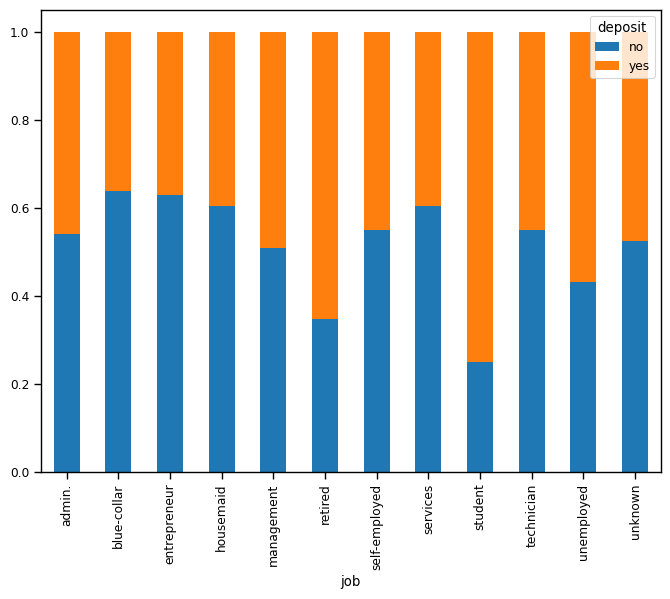

In [64]:
job = pd.crosstab(df_clean['job'],df_clean['deposit'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6));

#### Additional Pre-processing

##### One Hot Encoding

In [65]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10107 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10107 non-null  int64  
 1   job        10107 non-null  object 
 2   marital    10107 non-null  object 
 3   education  10107 non-null  object 
 4   default    10107 non-null  object 
 5   balance    10107 non-null  float64
 6   housing    10107 non-null  object 
 7   loan       10107 non-null  object 
 8   contact    10107 non-null  object 
 9   day        10107 non-null  int64  
 10  month      10107 non-null  object 
 11  duration   10107 non-null  int64  
 12  campaign   10107 non-null  int64  
 13  pdays      10107 non-null  int64  
 14  previous   10107 non-null  int64  
 15  poutcome   10107 non-null  object 
 16  deposit    10107 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [67]:
df_clean['poutcome'].sample(5)

4929    success
5462    unknown
883     unknown
9442    failure
8908    unknown
Name: poutcome, dtype: object

In [68]:
df_object = df_clean.select_dtypes(["object"])
obj_cols = list(df_object.columns)

obj_cols.remove("deposit")

In [69]:
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [70]:
df_result = pd.get_dummies(df_clean, columns = obj_cols)
df_result

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343.0,5,1042,1,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True
1,56,45.0,5,1467,1,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True
2,41,1270.0,5,1389,1,-1,0,yes,False,False,...,False,False,True,False,False,False,False,False,False,True
3,55,2476.0,5,579,1,-1,0,yes,False,False,...,False,False,True,False,False,False,False,False,False,True
4,54,184.0,5,673,2,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1.0,20,257,1,-1,0,no,False,True,...,False,False,False,False,False,False,False,False,False,True
11158,39,733.0,16,83,4,-1,0,no,False,False,...,True,False,False,False,False,False,False,False,False,True
11159,32,29.0,19,156,2,-1,0,no,False,False,...,False,False,False,False,False,False,False,False,False,True
11160,43,0.0,8,9,2,172,5,no,False,False,...,False,False,True,False,False,False,True,False,False,False


##### Split Train Test

In [71]:
df_result.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343.0,5,1042,1,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True
1,56,45.0,5,1467,1,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True
2,41,1270.0,5,1389,1,-1,0,yes,False,False,...,False,False,True,False,False,False,False,False,False,True
3,55,2476.0,5,579,1,-1,0,yes,False,False,...,False,False,True,False,False,False,False,False,False,True
4,54,184.0,5,673,2,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True


In [72]:
df_result['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 10107, dtype: object

In [ ]:
y = df_result["deposit"].map({"no": 0, "yes": 1})
X = df_result.drop(columns = ["deposit"], axis=1)

In [74]:
# Random splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

Splitting the data into train and validation set such as to validate the results of our model on the validation set. Keeping 30% of the dataset as our validation set and the rest as our training set.

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7074, 51)
(3033, 51)
(7074,)
(3033,)


##### Imbalance Problem

In [76]:
# Check the proportion of 0 and 1 in deposit label
y_test.value_counts()

deposit
0    1604
1    1429
Name: count, dtype: int64

Proportion of deposit label is balance, so we don't have to resampling

### Modeling

#### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree

In [78]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

#### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

crf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3, 
                             n_estimators=100, oob_score=True)
crf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, oob_score=True, random_state=42)

#### Hyperparameter Tuning

In [80]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [81]:
params = {
    'max_depth' : [2,3,4,5,10],
    'min_samples_leaf' : [5,10,20,50,100],
    'n_estimators' : [10,25,30,50,100]
}

In [82]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, 
                           cv=4, # cv: cross validation
                           n_jobs=-1, verbose=1, scoring="roc_auc")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='roc_auc', verbose=1)

In [83]:
grid_search.best_score_

0.9170916987979162

In [84]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

### Evaluation

In [85]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score

print("Accuracy score for Logistic Regression:",accuracy_score(y_test, y_lr))
print("Accuracy score for Decesion Tree:",accuracy_score(y_test, y_dtree))
print("Accuracy score for Random Forest:",accuracy_score(y_test, y_rf))

Accuracy score for Logistic Regression: 0.8051434223541049
Accuracy score for Decesion Tree: 0.7823936696340257
Accuracy score for Random Forest: 0.8367952522255193


In [87]:
from sklearn.metrics import precision_score

print("Precision score for Logistic Regression:",precision_score(y_test, y_lr, pos_label = 1, average='binary'))
print("Precision score for Decesion Tree:",precision_score(y_test, y_dtree, pos_label = 1, average='binary'))
print("Precision score for Random Forest:",precision_score(y_test, y_rf, pos_label = 1, average='binary'))

Precision score for Logistic Regression: 0.7997138769670958
Precision score for Decesion Tree: 0.7732764747690121
Precision score for Random Forest: 0.8100929614873837


In [88]:
from sklearn.metrics import recall_score

print("Recall score for Logistic Regression:",recall_score(y_test, y_lr, pos_label = 1, average='binary'))
print("Recall score for Decesion Tree:",recall_score(y_test, y_dtree, pos_label = 1, average='binary'))
print("Recall score for Random Forest:",recall_score(y_test, y_rf, pos_label = 1, average='binary'))

Recall score for Logistic Regression: 0.7823652904128762
Recall score for Decesion Tree: 0.761371588523443
Recall score for Random Forest: 0.853743876836949


In [89]:
from sklearn.metrics import roc_auc_score
y_lr_prob = lr.predict_proba(X_test)[:,1]
y_dtree_prob = dtree.predict_proba(X_test)[:,1]
y_rf_prob = rf_best.predict_proba(X_test)[:,1]

print("ROC AUC score for Logistic Regression:",roc_auc_score(y_test, y_lr_prob))
print("ROC AUC score for Decesion Tree:",roc_auc_score(y_test, y_dtree_prob))
print("ROC AUC score for Random Forest:",roc_auc_score(y_test, y_rf_prob))

ROC AUC score for Logistic Regression: 0.8784607759816695
ROC AUC score for Decesion Tree: 0.7812468915185793
ROC AUC score for Random Forest: 0.9121833275453772


In [90]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_lr))
print("Decesion Tree:")
print(classification_report(y_test, y_dtree))
print("Random Forest:")
print(classification_report(y_test, y_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1604
           1       0.80      0.78      0.79      1429

    accuracy                           0.81      3033
   macro avg       0.80      0.80      0.80      3033
weighted avg       0.81      0.81      0.81      3033

Decesion Tree:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1604
           1       0.77      0.76      0.77      1429

    accuracy                           0.78      3033
   macro avg       0.78      0.78      0.78      3033
weighted avg       0.78      0.78      0.78      3033

Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1604
           1       0.81      0.85      0.83      1429

    accuracy                           0.84      3033
   macro avg       0.84      0.84      0.84      3033
weighted avg       0.84

Observation: we got **84%** of accuracy score in **Random Forest** model